In [16]:
#import_libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from numpy import arange,array,ones
from scipy import stats
from sklearn import svm
from sklearn.svm import SVR
from scipy.interpolate import *
import statistics as st
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import pathlib
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import arange,array,ones
from scipy import stats
from scipy.interpolate import *
import statistics as st
from sklearn import svm
from sklearn.svm import SVR
###############################
# ### ## tensorflow
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from numpy.random import seed
# seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)

In [17]:
#please mention data file name here
filename ='descriptor_ABX2.csv' 
dataset = pd.read_csv(filename)
### check if any data is missing
dataset.isna().sum() 
### remove the line with missing data if any 
dataset = dataset.dropna()
#Remove the column with only text  and target column in X_1 by using their header
X_1 = dataset.drop(['BandGap','compound','Ksgap'], axis=1)
#mention the column header of target here
Y = dataset['BandGap']
X = preprocessing.scale(X_1)
print(X_1.columns.values.tolist())
print(len(X_1.columns.values.tolist()))

['AM1', 'AN1', 'Period1', 'group1', 'First_IE1', 'Second_IE1', 'elctron_AF1', 'paulielctrneg1  ', 'Allen_electneg1', 'vand_rad1', 'cov_rad1', 'atom_rad1', 'metling1', 'boiling1', 'density1', 'molarVol1', 'heat_fus1', 'heat_vap1', 'thermal_con1', 'spec_heat1', 'AM2', 'AN2', 'Period2', 'group2', 'First_IE21', 'Second_IE12', 'elctron_AF2', 'paulielctrneg2', 'Allen_electneg2', 'vand_rad2', 'cov_rad2', 'atom_rad2', 'metling2', 'boiling2', 'density2', 'molarVol2', 'heat_fus2', 'heat_vap2', 'thermal_con2', 'spec_heat2', 'AM3', 'AN3', 'Period3', 'group3', 'First_IE3', 'Second_IE3', 'elctron_AF3', 'paulielctrneg3  ', 'Allen_electneg3', 'vand_rad3', 'cov_rad3', 'atom_rad3', 'metling3', 'boiling3', 'density3', 'molarVol3', 'heat_fus3', 'heat_vap3', 'thermal_con3', 'spec_heat3', 'ST', 'KT', 'CP', 'Volume']
64


# Hyperparameter Tune

In [19]:
#for n in range (1,100):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=20)
#for i in range(1**(-5),1,1**(-1)):
for i in np.arange(0.001,1.0,0.001):
#       for j in range(1,2000,1):
            model = Ridge(alpha=i, max_iter=598, tol=0.001)
            model.fit(X_train, Y_train)
            y_train_predict = model.predict(X_train)
            rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
            r2 = r2_score(Y_train, y_train_predict)
            y_test_predict = model.predict(X_test)
            rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
            r2_test = r2_score(Y_test, y_test_predict)
#write output in a file named out.csv in same directory
            with open('out.csv', mode='a') as out_file:
                 out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)      
            #out_writer.writerow(['%s' %i, max_features, max_depth, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
                 out_writer.writerow(['%s' %i, j, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
                 out_file.close()
from shutil import copyfile
copyfile('out.csv', 'cross-validation-out.csv')
#Removing out.csv file
try:
    os.remove("out.csv")
except OSError:
    pass
data_stat=pd.read_csv('cross-validation-out.csv',  names = ["alpha","max_iter", "RMSE-Train", "R^square train", "RMSE-test", "R^square test"])  

In [20]:
data_stat.head(5)

alpha  max_iter  RMSE-Train  R^square train  RMSE-test  R^square test
0  0.001      1999    0.464110        0.878511   0.504778       0.803979
1  0.002      1999    0.464138        0.878496   0.504038       0.804553
2  0.003      1999    0.464184        0.878473   0.503337       0.805096
3  0.004      1999    0.464246        0.878440   0.502673       0.805610
4  0.005      1999    0.464324        0.878399   0.502046       0.806095

In [21]:
X1 = data_stat['RMSE-Train']
Y1 = data_stat['RMSE-test']

Text(0, 0.5, 'RMSE-Test')

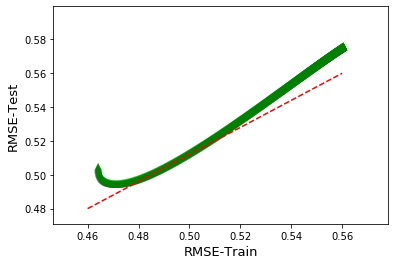

In [22]:
plt.scatter(X1, Y1, label='Training',facecolors='green',alpha=0.8, edgecolors='none',s=60,marker='^')
plt.plot((0.46,0.56),(0.48,0.56), 'r-',linestyle='dashed',label='y=x line')
plt.xlabel("RMSE-Train",fontsize=13)
plt.ylabel("RMSE-Test",fontsize=13)

In [7]:
#for n in range (1,100):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=20)
model = Ridge(alpha=0.030001, max_iter=598, tol=0.001)
model.fit(X_train, Y_train)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
#write output in a file named out.csv in same directory
with open('outN.csv', mode='a') as out_file:
    out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)      
            #out_writer.writerow(['%s' %i, max_features, max_depth, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
    out_writer.writerow(['%s' %i, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
    out_file.close()
from shutil import copyfile
copyfile('outN.csv', 'cross-validation-outN.csv')
try:
    os.remove("outN.csv")
except OSError:
    pass

In [8]:
rmse


0.4696076875135197

In [9]:
rmse_test

0.49481638072379097

In [10]:
model.score(X,Y)

0.863195250369126

# Cross Validation

In [11]:
testing_data_fraction=0.25
for n in range (1,100,1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testing_data_fraction, random_state=n)
    model = Ridge(alpha=0.030001, max_iter=598, tol=0.001)
    model.fit(X_train, Y_train)
### ## model evaluation for training set
    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    y_test_predict = model.predict(X_test)
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2_test = r2_score(Y_test, y_test_predict)
##########################################################################################################
### ## write output in a file named out.csv in same directory
### ## here we import the out.csv file and print the statistics
##write output in a file named out.csv in same directory
    with open('out_cross.csv', mode='a') as out_file:
        out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)      
        out_writer.writerow(['%s' %n, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
        out_file.close()
from shutil import copyfile
copyfile('out_cross.csv', 'cross-validation-out_stat.csv')
########################################################################################################################
# ###here we import the out.csv file and printthe statistics
data_stat = pd.read_csv('out_cross.csv',  names = ["RMSE-Train", "R^square train", "RMSE-test", "R^square test"])  
print(data_stat.describe())
data_stat.describe().to_csv("stat-results.csv")
#Removing out.csv file
try:
    os.remove("out_cross.csv")
except OSError:
    pass


       RMSE-Train  R^square train  RMSE-test  R^square test
count   99.000000       99.000000  99.000000      99.000000
mean     0.459656        0.870314   0.552549       0.800916
std      0.022273        0.011389   0.089733       0.066796
min      0.394751        0.838476   0.385228       0.499121
25%      0.447006        0.864780   0.494352       0.783385
50%      0.462236        0.869706   0.547349       0.813956
75%      0.474938        0.877112   0.598624       0.842222
max      0.507242        0.898711   0.843414       0.889417


In [12]:
r2_test

0.7631647827489743

In [13]:
rmse_test 

0.6190504067332463

# This section of the script is for an individual random state

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testing_data_fraction, random_state=6)
model = model
model.fit(X_train, Y_train)
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE of Training is {}'.format(rmse))
print('R2 score of Training set is {}'.format(r2))
#####################################################
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is Testing is {}'.format(rmse_test))
print('R2 score of Testing is {}'.format(r2_test))
######printing coefficient of the regression
print(np.vstack(X_1.columns.values.tolist()))
print("-----------------------------------------------")
print("-----------------------------------------------")
try:
    print ("The Dual coefficients are", np.vstack(model.dual_coef_))     
except AttributeError:
    pass
try:
    print ("The model coefficients are {}", np.vstack(model.coef_))
except AttributeError:
    pass
try:
    print ("The model coefficients are", np.vstack(model.feature_importances_))
except AttributeError:
    pass

The model performance for training set
--------------------------------------
RMSE of Training is 0.4562683405138242
R2 score of Training set is 0.8850323278665283
The model performance for testing set
--------------------------------------
RMSE is Testing is 0.5548238134219031
R2 score of Testing is 0.7057153519016668
[['AM1']
 ['AN1']
 ['Period1']
 ['group1']
 ['First_IE1']
 ['Second_IE1']
 ['elctron_AF1']
 ['paulielctrneg1  ']
 ['Allen_electneg1']
 ['vand_rad1']
 ['cov_rad1']
 ['atom_rad1']
 ['metling1']
 ['boiling1']
 ['density1']
 ['molarVol1']
 ['heat_fus1']
 ['heat_vap1']
 ['thermal_con1']
 ['spec_heat1']
 ['AM2']
 ['AN2']
 ['Period2']
 ['group2']
 ['First_IE21']
 ['Second_IE12']
 ['elctron_AF2']
 ['paulielctrneg2']
 ['Allen_electneg2']
 ['vand_rad2']
 ['cov_rad2']
 ['atom_rad2']
 ['metling2']
 ['boiling2']
 ['density2']
 ['molarVol2']
 ['heat_fus2']
 ['heat_vap2']
 ['thermal_con2']
 ['spec_heat2']
 ['AM3']
 ['AN3']
 ['Period3']
 ['group3']
 ['First_IE3']
 ['Second_IE3']
 ['elct

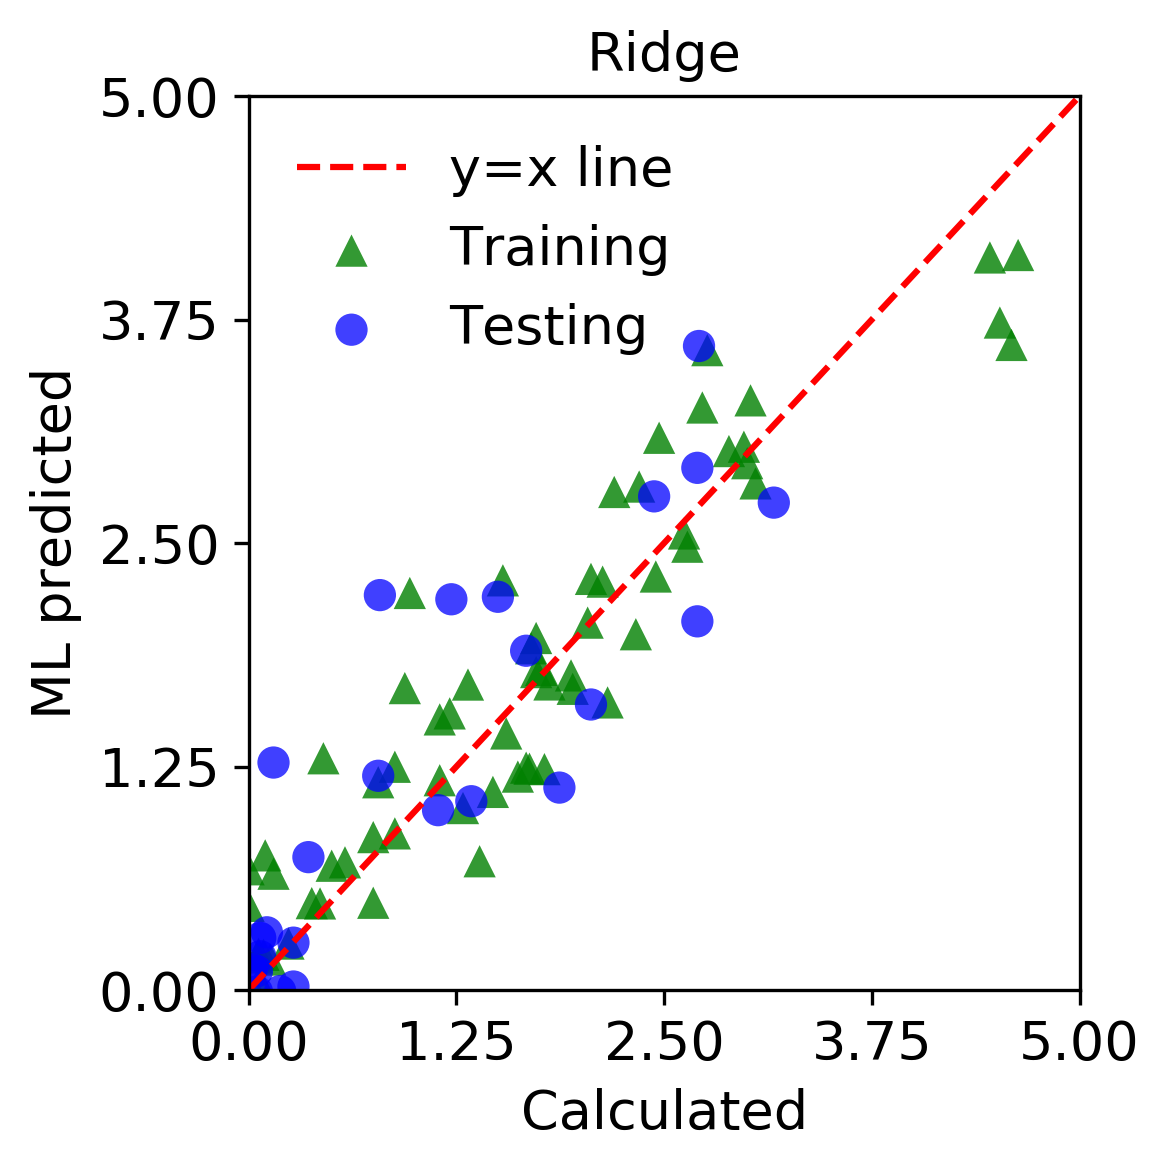

In [15]:
#### define your data plot here       
plt.figure(figsize=(4,4),dpi=300)
plt.title('Ridge', fontsize=13)
plt.xlim((0,5))
plt.xticks(np.linspace(0,5,5,endpoint=True))
plt.ylim((0,5))
plt.yticks(np.linspace(0,5,5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',facecolors='green',alpha=0.8, edgecolors='none',s=60,marker='^')
plt.scatter(Y_test, y_test_predict, label='Testing',facecolors='blue',alpha=0.75, edgecolors='none',s=60, marker='o')
plt.xlabel("Calculated",fontsize=13)
plt.ylabel("ML predicted",fontsize=13)
#####fitting with a y=x line here (polynomial approach)
plt.plot((0,5),(0,5), 'r',linestyle='dashed',label='y=x line')
plt.tight_layout()
plt.legend(loc=2, prop={'size': 13}, frameon=False)
#error=round(rmse_test,2)
#plt.text(2.5, 1.5, 'RMSE={}'.format(error), fontsize=13)
plt.savefig ('Ridge.pdf')
plt.show()